<a href="https://colab.research.google.com/github/wkwii97/pizza-detector/blob/main/Copy_of_PIZZA_or_NAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Pizza or Nah </h1>
<h5> By Warren and Evan </h5>
<h3> Building Neural Networks to detect Pizza </h3>

In [ ]:
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib.pyplot as plt

# Deep Learning
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.callbacks import EarlyStopping

# Co Lab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
directory = '/content/drive/My Drive/Machine Learning/Final Project/Datasets/pizza_not_pizza'
train = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,
    seed=5,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
val = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=5,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
classNames = ['notPizza', 'pizza']

Found 1966 files belonging to 2 classes.
Using 1573 files for training.
Found 1966 files belonging to 2 classes.
Using 393 files for validation.


In [ ]:
train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# New Section

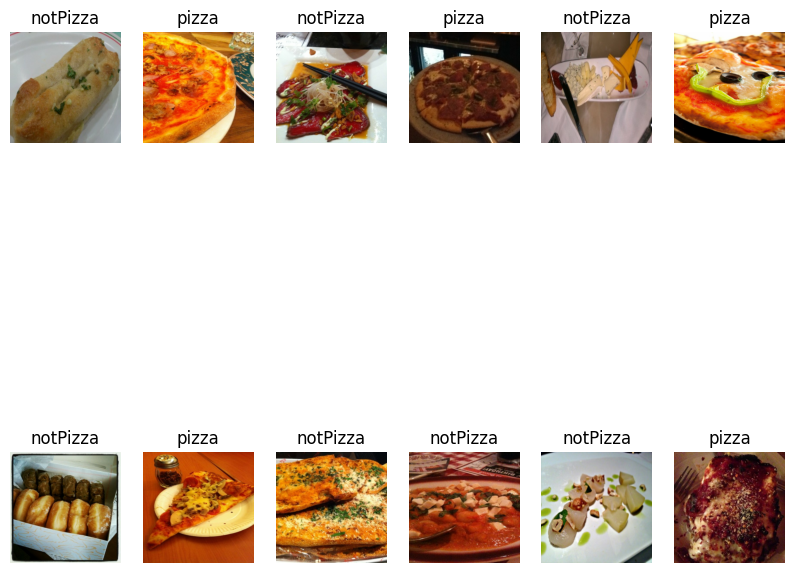

In [ ]:
# Plots some images
plt.figure(figsize=(10,10))
for img,label in train.take(1):
    for i in range(12):
        ax = plt.subplot(2, 6, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classNames[label[i]])
        plt.axis("off")


In [ ]:
# Regular Neural Network
model = Sequential([
    keras.layers.Reshape(target_shape=(256*256*3,), input_shape=(256, 256, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(192, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='softmax'),   
])

# Compile Model
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Run Model
history = model.fit(
    train.repeat(), 
    epochs=10, 
    steps_per_epoch=100,
    validation_data=val.repeat(), 
    validation_steps=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(val)
np.argmax(predictions[0])

13/13 [==============================] - 3s 108ms/step


0

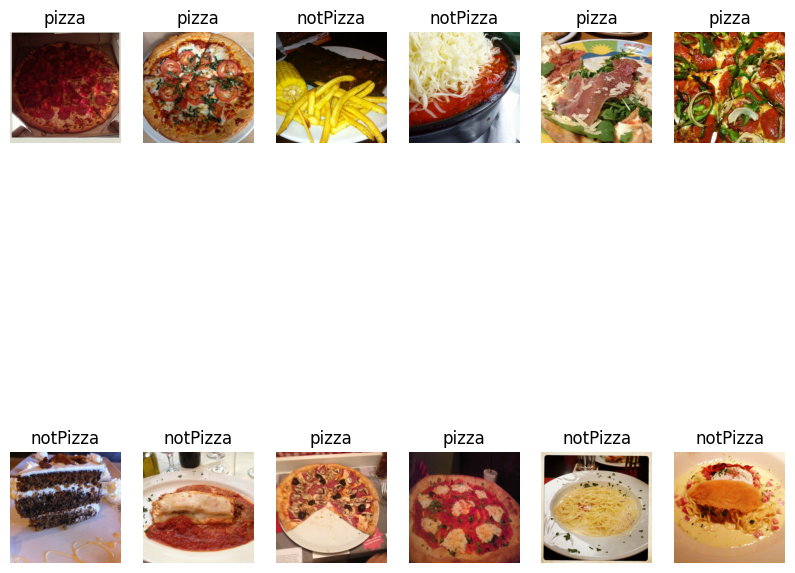

In [ ]:
# Re plot images for Convolutional Neural Network
plt.figure(figsize=(10,10))
for img,label in train.take(1):
    for i in range(12):
        ax = plt.subplot(2, 6, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classNames[label[i]])
        plt.axis("off")

In [ ]:
# Convolutional Base
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(256, (10, 10), activation='relu', input_shape=(256, 256, 3)))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Conv2D(128, (10, 10), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Conv2D(64, (10, 10), activation='relu'))

In [ ]:
# Displays Architecture of our CNN 
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 247, 247, 256)     77056     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 128)     3276928   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        819264    
                                                                 
Total params: 4,173,248
Trainable params: 4,173,248
Non-

In [ ]:
# Adding some Dense Layers
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(128, activation='relu'))
CNNmodel.add(layers.BatchNormalization())
CNNmodel.add(layers.Dense(1, activation='hard_sigmoid'))

In [ ]:
# New Model Summary
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 247, 247, 256)     77056     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 128)     3276928   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        819264    
                                                                 
 flatten (Flatten)           (None, 147456)            0

In [ ]:
# Compiling & Running Model 
CNNmodel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNNmodel.fit(
    train.repeat(), 
    epochs=10, 
    steps_per_epoch=100,
    validation_data=val.repeat(), 
    validation_steps=2)

Epoch 1/10
100/100 [==============================] - 417s 4s/step - loss: 0.6696 - accuracy: 0.6367 - val_loss: 0.8315 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 53s 527ms/step - loss: 0.6470 - accuracy: 0.6771 - val_loss: 0.6957 - val_accuracy: 0.7344
Epoch 3/10
100/100 [==============================] - 51s 507ms/step - loss: 0.6428 - accuracy: 0.6825 - val_loss: 0.6727 - val_accuracy: 0.6406
Epoch 4/10
100/100 [==============================] - 51s 506ms/step - loss: 0.6371 - accuracy: 0.6901 - val_loss: 0.6641 - val_accuracy: 0.6875
Epoch 5/10
100/100 [==============================] - 51s 506ms/step - loss: 0.6321 - accuracy: 0.7060 - val_loss: 0.6502 - val_accuracy: 0.5938
Epoch 6/10
100/100 [==============================] - 51s 507ms/step - loss: 0.6269 - accuracy: 0.7127 - val_loss: 0.6757 - val_accuracy: 0.6250
Epoch 7/10
100/100 [==============================] - 51s 511ms/step - loss: 0.6205 - accuracy: 0.7317 - val_loss: 0.6348 - val_accu

In [ ]:
# Final Convolutional Neural Network
FinalCNNmodel = tf.keras.Sequential([

    tf.keras.layers.Conv2D(256, kernel_size=10, padding='same', activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=10, strides=26, padding='same'),

 
    tf.keras.layers.Conv2D(150, kernel_size=10, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=10, strides=15, padding='same'),

   
    tf.keras.layers.Conv2D(125, kernel_size=10, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=10, strides=13, padding='same'),

   
    tf.keras.layers.Conv2D(100, kernel_size=10, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=10, strides=10, padding='same'),

   
    tf.keras.layers.Conv2D(70, kernel_size=5, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=5, strides=14, padding='same'),

   
    tf.keras.layers.Conv2D(40, kernel_size=5, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=5, strides=10, padding='same'),

   
    tf.keras.layers.Conv2D(10, kernel_size=1, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=1, strides=10, padding='same'),

   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation="relu"),

   
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="hard_sigmoid")

])

In [ ]:
# Compiling & Running Final Model 
# The first two blocks of code save the best model weights at any given point.
checkpoint_filepath = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_filepath)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

FinalCNNmodel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = FinalCNNmodel.fit(
    train.repeat(), 
    epochs=5, 
    steps_per_epoch=500,
    validation_data=val.repeat(), 
    validation_steps=2,
    callbacks=[model_checkpoint_callback]) # Model weights are saved at the end of every epoch, if it's the best seen so far.

# The model weights (that are considered the best) are loaded into the model.
# FinalCNNmodel.load_weights(checkpoint_filepath)

Epoch 1/5
500/500 [==============================] - 145s 279ms/step - loss: 0.6331 - accuracy: 0.7329 - val_loss: 0.6852 - val_accuracy: 0.7656
Epoch 2/5
500/500 [==============================] - 137s 274ms/step - loss: 0.5512 - accuracy: 0.9018 - val_loss: 0.7439 - val_accuracy: 0.6562
Epoch 3/5
500/500 [==============================] - 137s 273ms/step - loss: 0.5237 - accuracy: 0.9565 - val_loss: 0.6284 - val_accuracy: 0.7188
Epoch 4/5
500/500 [==============================] - 137s 273ms/step - loss: 0.5261 - accuracy: 0.9502 - val_loss: 0.6472 - val_accuracy: 0.7656
Epoch 5/5
500/500 [==============================] - 136s 272ms/step - loss: 0.5102 - accuracy: 0.9843 - val_loss: 0.5884 - val_accuracy: 0.7656


In [ ]:
tf.random.set_seed(10)

# params for regularization grid search

dropouts = [0.1,0.2,0.3,0.4]

GSmodels = []

GShistory = []

for i in range(len(dropouts)):

    # Set Regularization Param

    dropout = dropouts[i]

    # Model Architecture

    GSmodels.append(tf.keras.Sequential([

 

        tf.keras.layers.Conv2D(256, kernel_size=10, padding='same', activation="relu", input_shape=(256, 256, 3)),

        tf.keras.layers.MaxPooling2D(pool_size=10, strides=10, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(150, kernel_size=10, padding='same', activation="relu"),

        tf.keras.layers.MaxPooling2D(pool_size=10, strides=10, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(125, kernel_size=10, padding='same', activation="relu"),

        tf.keras.layers.MaxPooling2D(pool_size=10, strides=10, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(100, kernel_size=10, padding='same', activation="relu"),

        tf.keras.layers.MaxPooling2D(pool_size=10, strides=10, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(70, kernel_size=5, padding='same', activation="relu"),

        tf.keras.layers.MaxPooling2D(pool_size=7, strides=7, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(40, kernel_size=5, padding='same', activation="relu"),

        tf.keras.layers.MaxPooling2D(pool_size=7, strides=7, padding='same'),

        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout),

 

        tf.keras.layers.Conv2D(10, kernel_size=1, padding='same', activation="relu"),

       

 

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(20, activation="relu"),

 

        tf.keras.layers.Dense(1, activation="hard_sigmoid")

 

    ]))

 

    # Model Compile

    GSmodels[i].compile(optimizer='adam',

          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),

          metrics=['accuracy'])

    # Save parameters locally

    checkpoint_filepath = 'training_'+str(i)+'cp.ckpt'

    checkpoint_dir = os.path.dirname(checkpoint_filepath)

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(

                        filepath=checkpoint_filepath,

                        save_weights_only=True,

                        monitor='val_accuracy',

                        mode='max',

                        save_best_only=True,

                        save_freq='epoch')

    # Save model to history to reference later in this notebook

    GShistory.append(GSmodels[i].fit(train.repeat(),

                        epochs=10,

                        steps_per_epoch=500,

                        validation_data=val.repeat(),

                        validation_steps=25,

                        callbacks=[model_checkpoint_callback]))

    # Learning curves

    showHistory(GShistory[i])

Epoch 1/10
500/500 [==============================] - 501s 971ms/step - loss: 0.5848 - accuracy: 0.8072 - val_loss: 0.6249 - val_accuracy: 0.7272
Epoch 2/10
500/500 [==============================] - 470s 941ms/step - loss: 0.5426 - accuracy: 0.9097 - val_loss: 0.6107 - val_accuracy: 0.8005
Epoch 3/10
500/500 [==============================] - 469s 938ms/step - loss: 0.5302 - accuracy: 0.9385 - val_loss: 0.5975 - val_accuracy: 0.7773
Epoch 4/10
500/500 [==============================] - 475s 951ms/step - loss: 0.5262 - accuracy: 0.9470 - val_loss: 0.6298 - val_accuracy: 0.7761
Epoch 5/10
500/500 [==============================] - 469s 938ms/step - loss: 0.5214 - accuracy: 0.9584 - val_loss: 0.6046 - val_accuracy: 0.8121
Epoch 6/10
500/500 [==============================] - 467s 934ms/step - loss: 0.5188 - accuracy: 0.9640 - val_loss: 0.5893 - val_accuracy: 0.8147
Epoch 7/10
500/500 [==============================] - 464s 928ms/step - loss: 0.5167 - accuracy: 0.9680 - val_loss: 0.6068 -

NameError: ignored

In [ ]:
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'cp.ckpt.data-00000-of-00001', 'checkpoint']

In [ ]:
FinalCNNmodel.load_weights(checkpoint_filepath)

# Re-evaluate the model
loss, acc = FinalCNNmodel.evaluate(val, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

13/13 - 4s - loss: 0.6106 - accuracy: 0.7964 - 4s/epoch - 314ms/step
Restored model, accuracy: 79.64%
